## Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


### Load file, clean up and create new variables

In [5]:
df = pd.read_csv('2023_subway_censusvar.csv')

In [19]:
# create new column 'maintenance_time' 
# to calculate the time between 'Out of Service Date' and 'Actual Return to Service Date'

from datetime import datetime
df['Out of Service Date'] = pd.to_datetime(df['Out of Service Date'])
df['Actual Return to Service Date'] = pd.to_datetime(df['Actual Return to Service Date'])

df['maintenance_time'] = df['Actual Return to Service Date'] - df['Out of Service Date'] 

# df['maintenance_time'] into hours
df['maintenance_time'] = df['maintenance_time'].dt.total_seconds() / 3600
df.to_csv('2023_subway_censusvar_multire.csv', index=False)

In [20]:
df['maintenance_time'].isna().value_counts()

maintenance_time
False    15164
True      3044
Name: count, dtype: int64

In [18]:
df['maintenance_time'].describe()

count    15164.000000
mean         7.394358
std         55.056658
min          0.000000
25%          1.566667
50%          3.433333
75%          5.000000
max       3211.600000
Name: maintenance_time, dtype: float64

### Load file in R to plot charts

In [55]:
%%R -o df
df <- read_csv('2023_subway_censusvar_multire.csv')

Rows: 18208 Columns: 51
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (26): Common Name, Equipment Description, Executive Comment, Outage Cod...
dbl  (21): GEOID, Outage, Station MRN, Station ID, Complex ID, lat, long, AD...
dttm  (4): Out of Service Date, Estimated Return to Service Date, Actual Ret...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### 1D charts

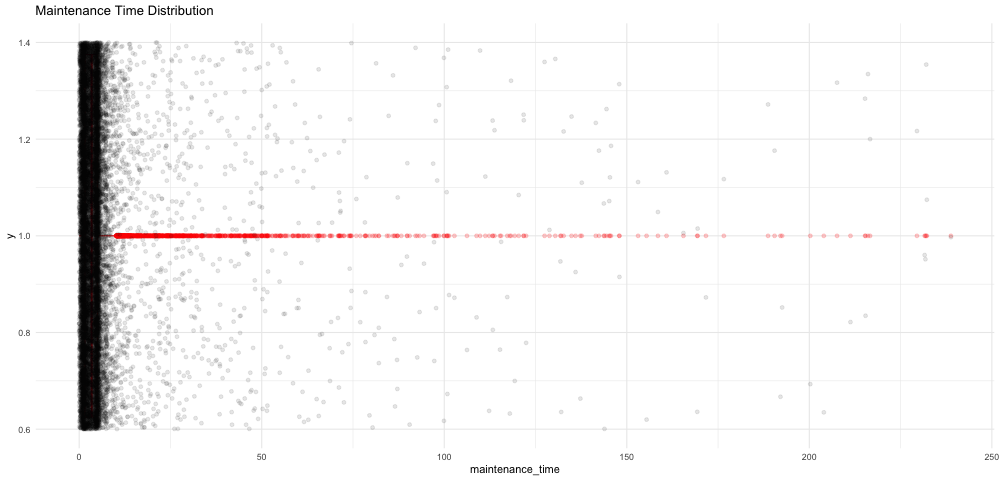

In [37]:
%%R -w 1000

df %>%
    filter(!is.na(maintenance_time)) %>%
    filter(maintenance_time < 250) %>%
    ggplot() +
    aes(x = maintenance_time, y=1) +
    # add a see through red wisisker plot 
    
    geom_boxplot(color = 'red', alpha=.2) +
    geom_jitter(alpha = 0.1) +
    theme_minimal() +
    labs(title = 'Maintenance Time Distribution')

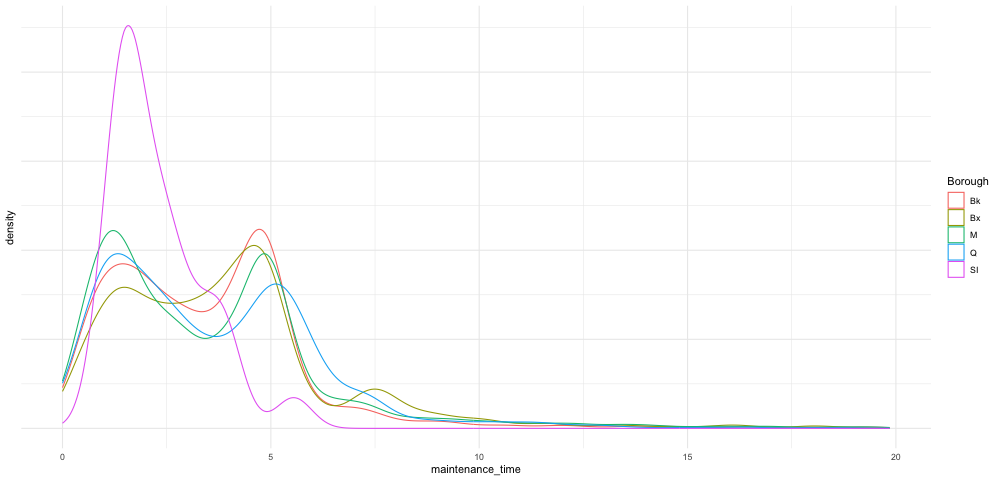

In [49]:
%%R -w 1000

df %>%
    filter(!is.na(maintenance_time)) %>%
    filter(maintenance_time < 20) %>%
    ggplot() +
    aes(x = maintenance_time, color = Borough) +
    geom_density() +
    theme_minimal() +
    # remove y ticks
    theme(axis.text.y=element_blank(), axis.ticks.y=element_blank()) 

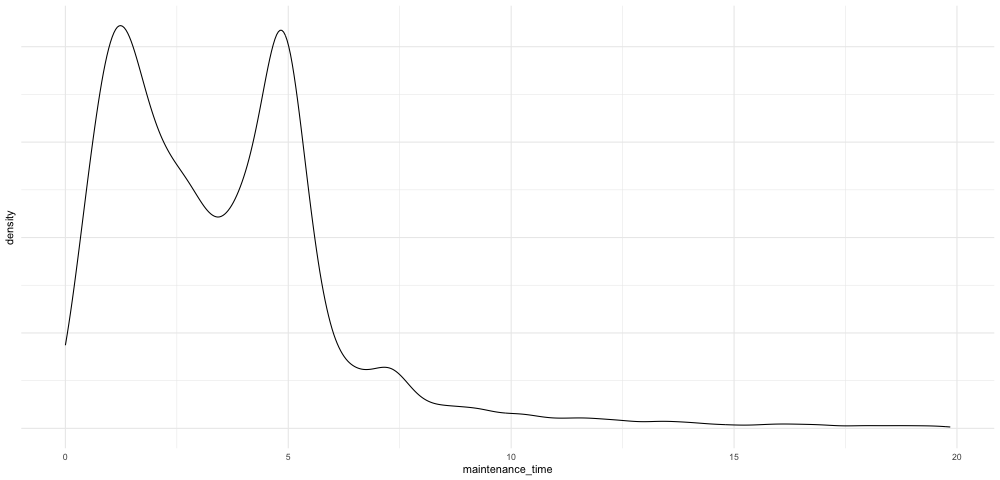

In [52]:
%%R -w 1000

df %>%
    filter(!is.na(maintenance_time)) %>%
    filter(maintenance_time < 20) %>%
    ggplot() +
    aes(x = maintenance_time) +
    geom_density() +
    theme_minimal() +
    # remove y ticks
    theme(axis.text.y=element_blank(), axis.ticks.y=element_blank()) 

In [ ]:
%%R
# rename df$Outage Code to df$Outage_Code
df <- df %>%
    rename(outage_code = `Outage Code`)

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Groups with fewer than two data points have been dropped. 

R[write to console]: 2: Groups with fewer than two data points have been dropped. 

R[write to console]: 3: Groups with fewer than two data points have been dropped. 

R[write to console]: 4: 
R[write to console]: In max(ids, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf

R[write to console]: 5: 
R[write to console]: In max(ids, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf

R[write to console]: 6: 
R[write to console]: In max(ids, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf



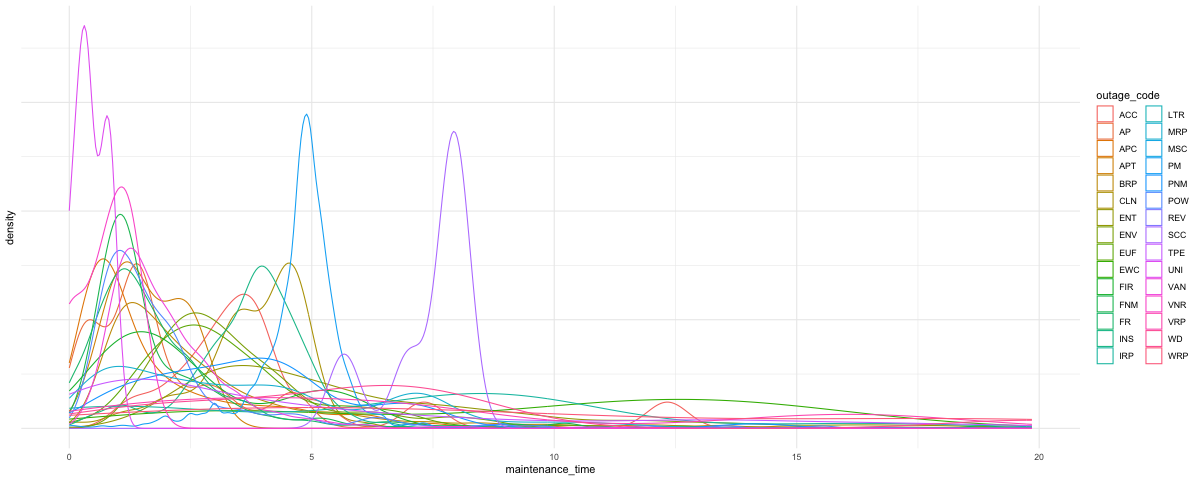

In [60]:
%%R -w 1200

df %>%
    filter(!is.na(maintenance_time)) %>%
    filter(maintenance_time < 20) %>%
    ggplot() +
    aes(x = maintenance_time, color=outage_code) +
    geom_density() +
    theme_minimal() +
    # remove y ticks
    theme(axis.text.y=element_blank(), axis.ticks.y=element_blank()) 